**目录**
1. 收集数据（block：北京市海淀区苏州街）
- 1.1收集租房价格
- 1.2收集购房价格
2. 数据处理（block：北京市海淀区苏州街、万柳、北太平庄、世纪城）
- 2.1数据合并
- 2.2数据描述
1. 进阶分析
- 3.1各社区中位数租售比（FigA.）
- 3.2基于下列回归模型，计算 $m^2 = 50, m^2 = 100$时各社区的租售比预测值（FigB. and C.）

Model 1：$$ price/m^2_i = β_0m^2_i +β_1location_i + β_2m^2_i × locationi + \epsilon_i$$
Model 2: $$ rent/m^2_i = β_0m^2_i +β_1location_i + β_2m^2_i × locationi + \epsilon_i$$



- 1.1收集租房价格

In [1]:
import re
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
import pandas as pd
import time

# 初始化 WebDriver
driver = webdriver.Edge()
url = 'https://zu.fang.com/'
driver.get(url)

# 定位并点击“海淀”链接
try:
    wait = WebDriverWait(driver, 10)
    haidian_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "海淀")))
    haidian_link.click()
    print("成功点击了'海淀'链接")
except (NoSuchElementException, StaleElementReferenceException) as e:
    print(f"无法定位或点击'海淀'链接: {e}")

# 定位并点击“苏州桥”链接
try:
    # 等待页面加载完成，确保元素可点击
    wait = WebDriverWait(driver, 10)  # 设置等待时间为10秒
    suzhouqiao_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "苏州桥")))
    suzhouqiao_link.click()  # 点击链接
    print("成功点击了'苏州桥'链接")
except (NoSuchElementException, StaleElementReferenceException) as e:
    print(f"无法定位或点击'苏州桥'链接: {e}")
    
# 初始化存储数据的列表
all_rental_info = []

# 循环翻页并提取数据
while True:
    try:
        # 等待页面加载并定位到租房列表区域
        time.sleep(2)
        shop_list_element =driver.find_element(By.ID, 'houselistbody')
        # 提取所有文本内容
        all_text = shop_list_element.text

        # 使用正则表达式提取面积（㎡）和租金（元/月）
        #area_pattern = r"\|(\d+)㎡\|"
        #price_pattern = r"\n(\d+)元/㎡\n"

        #areas = re.findall(area_pattern, all_text)
        #prices = re.findall(price_pattern, all_text)
        area_pattern = re.compile(r'(\d+)㎡')
        price_pattern = re.compile(r'(\d+)元/月')

        areas = area_pattern.findall(all_text)
        prices = price_pattern.findall(all_text)

        # 按照出现的先后顺序匹配面积和租金
        for area, price in zip(areas, prices):
            all_rental_info.append({"面积（㎡）": int(area), "租金（元/月）": int(price)})

        # 定位“下一页”链接
        next_page_link = driver.find_element(By.LINK_TEXT, "下一页")
        next_page_link.click()  # 点击“下一页”链接

        # 等待页面加载
        time.sleep(2)  # 等待2秒，确保页面加载完成

    except NoSuchElementException:
        # 如果没有找到“下一页”链接，则退出循环
        break
    except (NoSuchElementException, StaleElementReferenceException) as e:
        print(f"无法定位或提取内容: {e}")
        break

# 将提取的信息保存到 DataFrame
df = pd.DataFrame(all_rental_info)
print("提取的关键信息：")
print(df)

# 保存到 CSV 文件（可选）
df.to_csv("rental_info_苏州桥.csv", index=False, encoding="utf-8-sig")
print("关键信息已保存到 rental_info_苏州桥.csv 文件中")


driver.quit()

成功点击了'海淀'链接
成功点击了'苏州桥'链接
提取的关键信息：
     面积（㎡）  租金（元/月）
0      100    20000
1       71    14300
2       66     7600
3       68     7500
4       56     7000
..     ...      ...
187      8     2000
188     41     7800
189     40     6300
190     59     7200
191     23     5000

[192 rows x 2 columns]
关键信息已保存到 rental_info_苏州桥.csv 文件中


- 1.2收集购房价格

In [2]:
import re
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
import pandas as pd
import time

# 初始化 WebDriver
driver = webdriver.Edge()
url = 'https://esf.fang.com/'
driver.get(url)

# 定位并点击“海淀”链接
try:
    wait = WebDriverWait(driver, 10)
    haidian_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "海淀")))
    haidian_link.click()
    print("成功点击了'海淀'链接")
except (NoSuchElementException, StaleElementReferenceException) as e:
    print(f"无法定位或点击'海淀'链接: {e}")

# 定位并点击“苏州桥”链接
try:
    # 等待页面加载完成，确保元素可点击
    wait = WebDriverWait(driver, 10)  # 设置等待时间为10秒
    suzhouqiao_link = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, "苏州桥")))
    suzhouqiao_link.click()  # 点击链接
    print("成功点击了'苏州桥'链接")
except (NoSuchElementException, StaleElementReferenceException) as e:
    print(f"无法定位或点击'苏州桥'链接: {e}")

# 初始化存储数据的列表
all_resold_info = []

# 循环翻页并提取数据
while True:
    try:
        # 等待页面加载并定位到租房列表区域
        time.sleep(2)
        shop_list_element =driver.find_element(By.CSS_SELECTOR, '.shop_list.shop_list_4')
        # 提取所有文本内容
        all_text = shop_list_element.text

        # 使用正则表达式提取面积（㎡）和单价（元/㎡）
        area_pattern = r"\|\s*(\d+\.?\d*)㎡\s*\|"
        price_pattern = r"\n(\d+,\d+|\d+)\s*元/㎡\n"

        areas = re.findall(area_pattern, all_text)
        prices = re.findall(price_pattern, all_text)

        # 按照出现的先后顺序匹配面积和租金
        for area, price in zip(areas, prices):
            all_resold_info.append({"面积（㎡）": float(area), "单价（元/㎡）": int(price)})

        # 定位“下一页”链接
        next_page_link = driver.find_element(By.LINK_TEXT, "下一页")
        next_page_link.click()  # 点击“下一页”链接

        # 等待页面加载
        time.sleep(2)  # 等待2秒，确保页面加载完成

    except NoSuchElementException:
        # 如果没有找到“下一页”链接，则退出循环
        break
    except (NoSuchElementException, StaleElementReferenceException) as e:
        print(f"无法定位或提取内容: {e}")
        break

# 将提取的信息保存到 DataFrame
df = pd.DataFrame(all_resold_info)
print("提取的关键信息：")
print(df)

# 保存到 CSV 文件（可选）
df.to_csv("resold_info_苏州桥.csv", index=False, encoding="utf-8-sig")
print("关键信息已保存到 resold_info_苏州桥.csv 文件中")


driver.quit()    

成功点击了'海淀'链接
成功点击了'苏州桥'链接
提取的关键信息：
      面积（㎡）  单价（元/㎡）
0     67.58    66587
1    254.00    52362
2     81.55    95646
3    100.10    84915
4     91.28    78878
..      ...      ...
156   84.06    86842
157   56.73    82672
158   94.70    85533
159   67.90   100000
160   42.40    79952

[161 rows x 2 columns]
关键信息已保存到 resold_info_苏州桥.csv 文件中


2.1数据合并

In [3]:
import pandas as pd

# 读取并处理苏州桥的数据
suzhouqiao = pd.read_csv('resold_info_苏州桥.csv')
suzhouqiao.columns = ['area', 'unit_price'] 
suzhouqiao['location'] = '苏州桥'
suzhouqiao['locationid']=1

# 读取并处理世纪城的数据
shijicheng = pd.read_csv('house_data.csv',encoding='gb18030')
shijicheng.columns = ['other_columns','unit_price', 'area']  # 假设其他列名
shijicheng = shijicheng.drop(columns=['other_columns']) #删去other_columns
shijicheng = shijicheng[['area','unit_price']] #调整列的顺序，把area放在unit_price前
shijicheng['location'] = '世纪城'
shijicheng['locationid']=2

# 读取并处理北太平庄的数据
beitai_pingzhuang = pd.read_csv('Price_Beitaipingzhuang.csv')
beitai_pingzhuang = beitai_pingzhuang.drop(columns=['total_price'])
beitai_pingzhuang.columns = ['area','unit_price']  # 假设其他列名
beitai_pingzhuang['location'] = '北太平庄'
beitai_pingzhuang['locationid']=3

# 读取并处理万柳的数据
wanliu = pd.read_excel('house_data_万柳.xlsx')
wanliu = wanliu.drop(columns=['总价（万元）'])
wanliu.columns = ['area', 'unit_price']  # 假设其他列名
wanliu['location'] = '万柳'
wanliu['locationid']=4

# 合并所有数据
resold = pd.concat([suzhouqiao, shijicheng, beitai_pingzhuang, wanliu], ignore_index=True)

# 保存合并后的数据
resold.to_csv('merged_resold_data.csv', index=False)
print("数据合并完成，保存为merged_resold_data.csv")

数据合并完成，保存为merged_resold_data.csv


In [4]:
import pandas as pd

# 读取并处理苏州桥的数据
suzhouqiao = pd.read_csv('rental_info_苏州桥.csv')
suzhouqiao.columns = ['area', 'rent'] 
suzhouqiao['location'] = '苏州桥'
suzhouqiao['locationid']=1

# 读取并处理世纪城的数据
shijicheng = pd.read_csv('rent_data.csv',encoding='gb18030')
shijicheng.columns = ['rent', 'area']  # 假设其他列名
shijicheng = shijicheng[['area','rent']] #调整列的顺序，把area放在rent前
shijicheng['location'] = '世纪城'
shijicheng['locationid']=2

# 读取并处理北太平庄的数据
beitai_pingzhuang = pd.read_csv('Rent_Beitaipingzhuang.csv')
beitai_pingzhuang.columns = ['area','rent']  # 假设其他列名
beitai_pingzhuang['location'] = '北太平庄'
beitai_pingzhuang['locationid']=3

# 读取并处理万柳的数据
wanliu = pd.read_excel('rent_data_万柳.xlsx')
wanliu.columns = ['area', 'rent']  # 假设其他列名
wanliu['location'] = '万柳'
wanliu['locationid']=4

# 合并所有数据
rental = pd.concat([suzhouqiao, shijicheng, beitai_pingzhuang, wanliu], ignore_index=True)
rental['unit_rent']=rental['rent']/rental['area']

# 保存合并后的数据
rental.to_csv('merged_rental_data.csv', index=False)
print("数据合并完成，保存为merged_rental_data.csv")

数据合并完成，保存为merged_rental_data.csv


2.2数据描述

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='YouYuan')

# 加载合并后的数据
resold_data = pd.read_csv('merged_resold_data.csv')
rental_data = pd.read_csv('merged_rental_data.csv')

# 数据描述性统计
def describe_data(df, name):
    print(f"数据集: {name}")
    print("基础描述性统计：")
    print(df.describe())
    print("\n数据分布情况：")
    print(df.groupby('location').describe())
    print("\n数据缺失值情况：")
    print(df.isnull().sum())
    print("\n数据类型：")
    print(df.dtypes)

# 对二手房数据进行描述性统计
describe_data(resold_data, "二手房数据")

# 对租赁数据进行描述性统计
describe_data(rental_data, "租赁数据")

数据集: 二手房数据
基础描述性统计：
              area     unit_price   locationid
count  1965.000000    1965.000000  1965.000000
mean    157.886728  128705.523155     2.561323
std      67.246536   32917.319941     1.010601
min      26.800000   52362.000000     1.000000
25%     121.880000  106329.000000     2.000000
50%     158.640000  127559.000000     2.000000
75%     186.410000  144066.000000     4.000000
max     556.000000  283908.000000     4.000000

数据分布情况：
            area                                                          \
           count        mean        std    min     25%     50%       75%   
location                                                                   
万柳         600.0  167.992267  89.058171  42.10  115.69  148.35  199.6625   
世纪城       1140.0  167.457991  44.612663  51.88  136.17  165.47  192.7800   
北太平庄        64.0   68.413125  17.252247  33.15   54.13   63.51   82.6300   
苏州桥        161.0   88.021801  48.791882  26.80   58.50   67.09   94.7000   

               


二手房数据中面积的异常值：
        area  unit_price location  locationid
247   326.61      143902      世纪城           2
322   326.61      143902      世纪城           2
381   323.52      150840      世纪城           2
393   334.92      155260      世纪城           2
572   334.92      155260      世纪城           2
...      ...         ...      ...         ...
1886  286.01      179014       万柳           4
1893  550.00      245454       万柳           4
1897  299.43      173663       万柳           4
1945  330.00      136363       万柳           4
1951  299.19       61833       万柳           4

[84 rows x 4 columns]

二手房数据中单价的异常值：
        area  unit_price location  locationid
702   300.00      216666      世纪城           2
811   300.00      216666      世纪城           2
1369  395.22      245432       万柳           4
1372  114.59      209442       万柳           4
1375  218.38      255517       万柳           4
...      ...         ...      ...         ...
1876  395.20      245445       万柳           4
1893  550.00      245454   

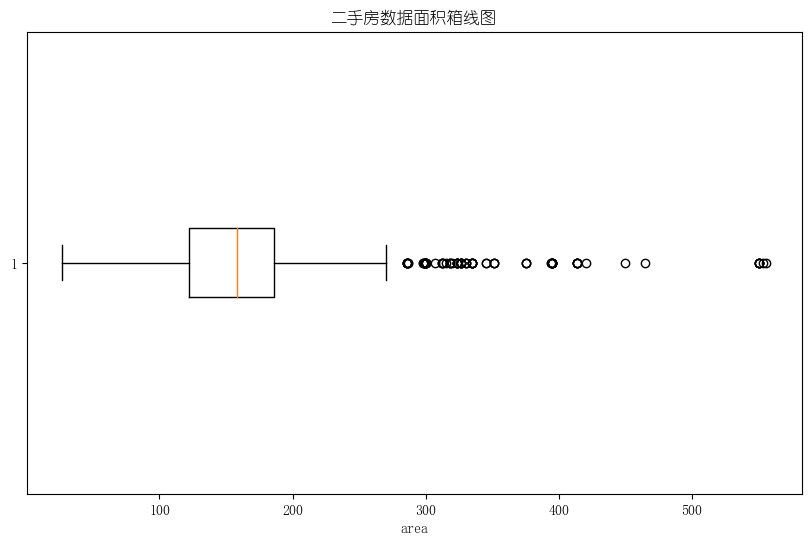

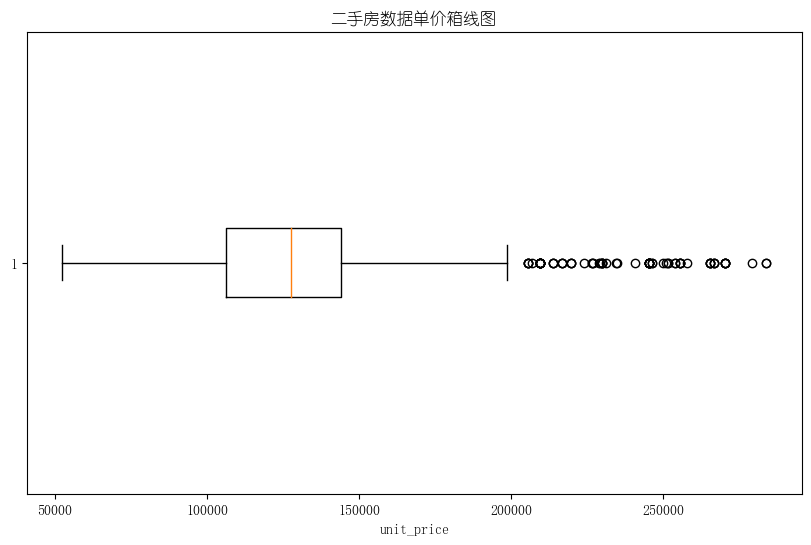

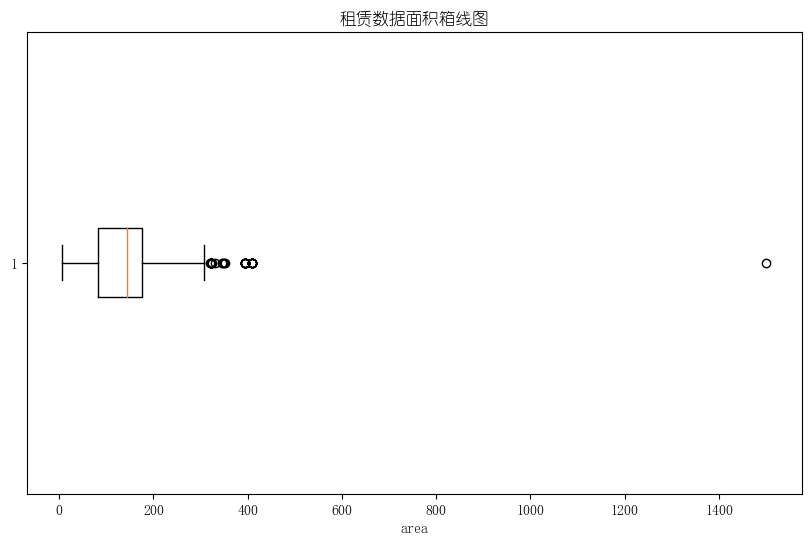

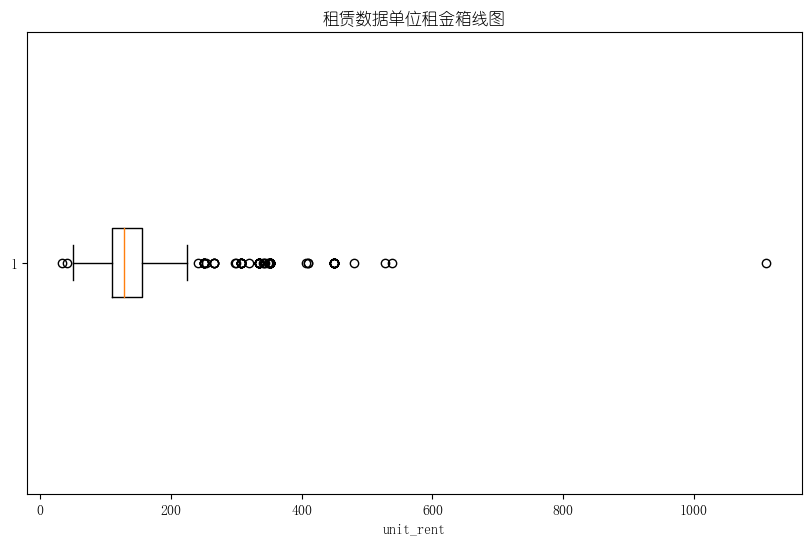

In [6]:
# 检测异常值
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 检测二手房数据中的异常值
resold_outliers_area = detect_outliers(resold_data, 'area')
resold_outliers_unit_price = detect_outliers(resold_data, 'unit_price')
print("\n二手房数据中面积的异常值：")
print(resold_outliers_area)
print("\n二手房数据中单价的异常值：")
print(resold_outliers_unit_price)

# 检测租赁数据中的异常值
rental_outliers_area = detect_outliers(rental_data, 'area')
rental_outliers_unit_rent = detect_outliers(rental_data, 'unit_rent')
print("\n租赁数据中面积的异常值：")
print(rental_outliers_area)
print("\n租赁数据中单位租金的异常值：")
print(rental_outliers_unit_rent)

# 绘制箱线图可视化异常值
def plot_boxplot(df, column, title):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# 绘制二手房数据的面积和单价箱线图
plot_boxplot(resold_data, 'area', '二手房数据面积箱线图')
plot_boxplot(resold_data, 'unit_price', '二手房数据单价箱线图')

# 绘制租赁数据的面积和单位租金箱线图
plot_boxplot(rental_data, 'area', '租赁数据面积箱线图')
plot_boxplot(rental_data, 'unit_rent', '租赁数据单位租金箱线图')

3.1各街区租售比

In [7]:
import pandas as pd

# 加载合并后的数据
resold_data = pd.read_csv('merged_resold_data.csv')
rental_data = pd.read_csv('merged_rental_data.csv')

# 计算每个区域的房价每平方米（price/m2）和租金每平方米（rent/m2）
price_per_m2 = resold_data.groupby('location')['unit_price'].median()
rent_per_m2 = rental_data.groupby('location')['unit_rent'].median()

# 计算每个区域的中位数房价租金比（median price to rent ratio）
price_to_rent_ratio = price_per_m2 / rent_per_m2

# 打印结果
print("每个区域的房价每平方米（price/m2）：")
print(price_per_m2)
print("\n每个区域的租金每平方米（rent/m2）：")
print(rent_per_m2)
print("\n每个区域的中位数房价租金比（median price to rent ratio）：")
print(price_to_rent_ratio)

每个区域的房价每平方米（price/m2）：
location
万柳      145669.0
世纪城     124553.0
北太平庄     89461.5
苏州桥      86460.0
Name: unit_price, dtype: float64

每个区域的租金每平方米（rent/m2）：
location
万柳      148.765274
世纪城     114.906832
北太平庄    142.201835
苏州桥     133.568075
Name: unit_rent, dtype: float64

每个区域的中位数房价租金比（median price to rent ratio）：
location
万柳       979.186851
世纪城     1083.947730
北太平庄     629.116355
苏州桥      647.310369
dtype: float64


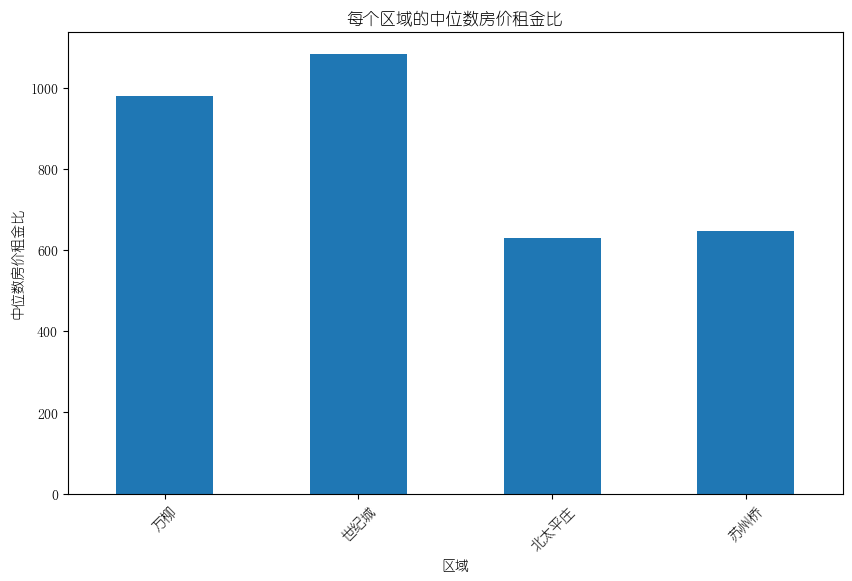

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载合并后的数据
resold_data = pd.read_csv('merged_resold_data.csv')
rental_data = pd.read_csv('merged_rental_data.csv')

# 计算每个区域的房价每平方米（price/m2）和租金每平方米（rent/m2）
price_per_m2 = resold_data.groupby('location')['unit_price'].median()
rent_per_m2 = rental_data.groupby('location')['unit_rent'].median()

# 计算每个区域的中位数房价租金比（median price to rent ratio）
price_to_rent_ratio = price_per_m2 / rent_per_m2

# 绘制条形图
plt.figure(figsize=(10, 6))
price_to_rent_ratio.plot(kind='bar')
plt.title('每个区域的中位数房价租金比')
plt.xlabel('区域')
plt.ylabel('中位数房价租金比')
plt.xticks(rotation=45)
plt.show()

3.2 模型回归与预测

In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取二手房交易数据
resold = pd.read_csv('merged_resold_data.csv')
resold = resold.dropna()
resold['unit_price'] = resold['unit_price'].astype(float)
resold['area'] = resold['area'].astype(float)
# 读取出租房数据
rental = pd.read_csv('merged_rental_data.csv')
rental = rental.dropna()
rental['unit_rent'] = rental['unit_rent'].astype(float)
rental['area'] = rental['area'].astype(float)
# 创建虚拟变量（固定效应）
resold = pd.get_dummies(resold, columns=['locationid'], drop_first=True)
rental = pd.get_dummies(rental, columns=['locationid'], drop_first=True)

# 构造交互项 m2 × location（基于虚拟变量）
for col in ['locationid_2', 'locationid_3', 'locationid_4']:
    resold[f'm2_{col}'] = resold['area'] * resold[col]
    rental[f'm2_{col}'] = rental['area'] * rental[col]
for col in ['locationid_2', 'locationid_3', 'locationid_4']:
    resold[col] = resold[col].astype(int)
    rental[col] = rental[col].astype(int)
    
# 定义自变量和因变量
X_price = resold[['area', 'locationid_2', 'locationid_3', 'locationid_4',
                  'm2_locationid_2', 'm2_locationid_3', 'm2_locationid_4']]
X_rent = rental[['area', 'locationid_2', 'locationid_3', 'locationid_4',
                 'm2_locationid_2', 'm2_locationid_3', 'm2_locationid_4']]
y_price = resold['unit_price']
y_rent = rental['unit_rent']

# 添加常数项
X_price = sm.add_constant(X_price)
X_rent = sm.add_constant(X_rent)


# 模型拟合
model_price = sm.OLS(y_price, X_price).fit()
model_rent = sm.OLS(y_rent, X_rent).fit()

# 打印模型摘要
print("Model 1 (Price):")
print(model_price.summary())
print("\nModel 2 (Rent):")
print(model_rent.summary())

Model 1 (Price):
                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     309.7
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          2.32e-311
Time:                        11:00:26   Log-Likelihood:                -22495.
No. Observations:                1965   AIC:                         4.501e+04
Df Residuals:                    1957   BIC:                         4.505e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.246e+0

In [10]:
# 准备预测数据
m2_values = [50, 100]
locations = [1, 2, 3, 4]  # locationid 的所有值

# 创建一个空的DataFrame来存储预测结果
predictions = []

for m2 in m2_values:
    for loc_id in locations:
        # 构造输入数据（价格模型）
        input_price = pd.DataFrame({
            'const': [1],
            'area': [m2],
            'locationid_2': [1 if loc_id == 2 else 0],
            'locationid_3': [1 if loc_id == 3 else 0],
            'locationid_4': [1 if loc_id == 4 else 0],
            'm2_locationid_2': [m2 if loc_id == 2 else 0],
            'm2_locationid_3': [m2 if loc_id == 3 else 0],
            'm2_locationid_4': [m2 if loc_id == 4 else 0]
        })
        
        # 构造输入数据（租金模型）
        input_rent = pd.DataFrame({
            'const': [1],
            'area': [m2],
            'locationid_2': [1 if loc_id == 2 else 0],
            'locationid_3': [1 if loc_id == 3 else 0],
            'locationid_4': [1 if loc_id == 4 else 0],
            'm2_locationid_2': [m2 if loc_id == 2 else 0],
            'm2_locationid_3': [m2 if loc_id == 3 else 0],
            'm2_locationid_4': [m2 if loc_id == 4 else 0]
        })
        
        # 预测价格和租金
        price_pred = model_price.predict(input_price)[0]
        rent_pred = model_rent.predict(input_rent)[0]
        
        # 存储预测结果
        predictions.append({
            'm2': m2,
            'locationid': loc_id,
            'predicted_price': price_pred,
            'predicted_rent': rent_pred
        })

# 转换为DataFrame
predictions_df = pd.DataFrame(predictions)

# 计算价格与租金的比率
predictions_df['price_to_rent_ratio'] = predictions_df['predicted_price'] / predictions_df['predicted_rent']

# 定义 locationid 到地区名称的映射
location_mapping = {
    1: '苏州桥',
    2: '万柳',
    3: '北太平庄',
    4: '世纪城'
}
# 将地区名称添加到 predictions_df
predictions_df['location'] = predictions_df['locationid'].map(location_mapping)

# 打印预测结果
print(predictions_df)

    m2  locationid  predicted_price  predicted_rent  price_to_rent_ratio  \
0   50           1     89051.522264      174.443603           510.488896   
1   50           2    113276.811329       98.142912          1154.202678   
2   50           3     84782.267581      149.413450           567.433972   
3   50           4    123561.954788      138.204822           894.049523   
4  100           1     85638.156244       68.393565          1252.137619   
5  100           2    117654.479121      109.944873          1070.122469   
6  100           3    102575.785911      132.457041           774.407953   
7  100           4    136377.203646      154.436641           883.062483   

  location  
0      苏州桥  
1       万柳  
2     北太平庄  
3      世纪城  
4      苏州桥  
5       万柳  
6     北太平庄  
7      世纪城  


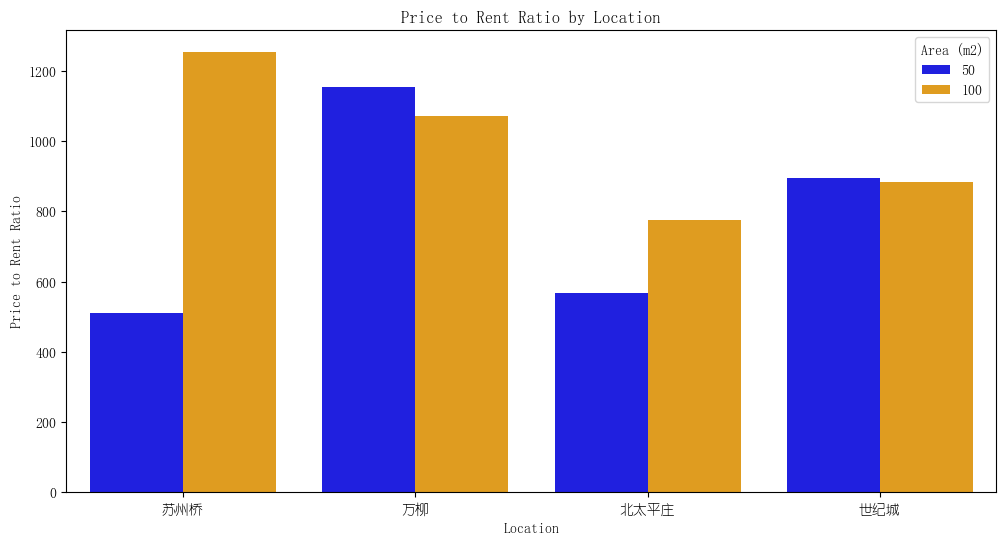

In [11]:
import matplotlib
matplotlib.rc("font",family='YouYuan')
# 设置绘图参数
plt.figure(figsize=(12, 6))

# 使用 seaborn 的 barplot 绘制分组条形图
sns.barplot(
    data=predictions_df,
    x='location',  # 按地区名称分组
    y='price_to_rent_ratio',  # 纵轴为价格与租金比率
    hue='m2',  # 按 m2 值分组
    palette=['blue', 'orange']  # 颜色区分 m2 = 50 和 m2 = 100
)

# 添加标题和标签
plt.title('Price to Rent Ratio by Location')
plt.xlabel('Location')
plt.ylabel('Price to Rent Ratio')

# 显示图例
plt.legend(title='Area (m2)', loc='upper right')

# 显示图表
plt.show()